### Perceptron de Camada Única

Do inglês Singles Layer Perceptron (SLP), é uma das primeiras e mais antigas redes neurais criada. Foi proposta por Frank Rosenblatt em 1958. Por ser o tipo mais imples de rede neural, ela apenas classifica casos linearmente separáveis de forma binária. 

Uma SLP é uma rede de alimentação direta baseada em uma função de transferência. Essas funções são equações matemáticas que determinam a saída de uma rede neural.

Componentes do Perceptron:
- Input: entradas reais ou binárias;
- Peso: cada entrada é associada à um peso, representando o seu grau de importância;
- Bias: esse termo permite o neurônio ser ativado até quando a entrada é zero, mitigando o problema de _vanishing gradient_;
- Função de ativação: o perceptron usa uma função degrau para determinar se a soma do produto da entrada pelo peso, somado ao bias, está acima ou abaixo de um certo limite.

### Importando bibliotecas

In [525]:
import pprint
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Função de treinamento

In [435]:
def treinamento(X_train, y_train, qtd_atributos, tx_aprendizagem, epocas, seed):
    """
        Argumentos:
        X_train -- amostras de treino
        y_train -- resultados desejados das amostras de treino
        qtd_atributos -- quantidade de features
        tx_aprendizagem -- taxa de aprendizado da rede
        epocas -- cada apresentação completa de todas as amostras pertencentes ao subconjunto de treinamento
        seed -- para garantir que sempre será utilizado o mesmo número aleatório
        
        Saída:
        parâmetros -- python dict:
                        peso aprendido -- pesos aprendidos ao final do treinamento
                        epocas executadas -- quantidade total de épocas ao final do treinamento
                        evolucao do erro -- lista contendo a evolução do erro ao longo das épocas
                        acuracia -- relação entre o total de acertos e o total de amostras
    """

    np.random.seed(seed)

    pesos = np.random.uniform(low=-0.5, high=0.5, size=((qtd_atributos + 1),))  # vetor de peso (atributos + bias)
    eta = tx_aprendizagem                                                       # taxa de aprendizagem
    epoca = 0                                                                   # contador de epoca
    evolucao_erro = []
    acuracia_epocas = []

    while epoca < epocas:
        erro = 0
        acertos = 0

        for i in range(len(X_train)):
            x_amostra = X_train[i].flatten()
            x = np.concatenate(([1], x_amostra))                # adiciona o bias em uma amostra
            y_desejado = y_train[i].flatten()

            u = np.dot(pesos, x)                                # potencial de ativação (produto escalar)

            if u >= 0:                                          # função de ativação -> y_pred = sinal(u)
                y_pred = 1
            else:
                y_pred = -1

            if y_pred != y_desejado:                            # regra de aprendizado de Hebb
                pesos = pesos + eta * (y_desejado - y_pred) * x
                erro += 1
            else:
                acertos += 1
        
        acuracia_epocas.append(acertos/len(X_train))       # evolução da acurácia ao longo das épocas

        evolucao_erro.append(erro/len(X_train))     # evolução do erro ao longo das épocas

        epoca += 1

        if erro == 0:
            break
    
    return {
        "peso aprendido": pesos,
        "epocas executadas": epoca,
        "evolucao do erro": evolucao_erro,
        "evolucao acuracia": acuracia_epocas,
        "acuracia": acertos/len(X_train)
    }
                

### Função de teste

In [436]:
def teste(X_test, y_test, peso):
    """
        Argumentos:
        X_test -- amostras de teste
        y_test -- resultados desejados das amostras de teste
        peso -- pesos aprendidos durante o treinamento
        
        Saída:
        parâmetros -- python dict:
                        acuracia -- relação entre o total de acertos e o total de amostras
    """

    acertos = 0                                 # contador de acertos
    acuracia_epocas = []
    
    for i in range(len(X_test)):
        x_amostra = X_test[i].flatten()
        x = np.concatenate(([1], x_amostra))    # adiciona o bias em uma amostra
        y_desejado = y_test[i].flatten()

        u = np.dot(x, peso)                     # potencial de ativação com base no peso aprendido

        if u >= 0:                              # função de ativação -> y_pred = sinal(u)
            y_pred = 1
        else:
            y_pred = -1

        if y_pred == y_desejado:
            acertos += 1

        acuracia_epocas.append(acertos/len(X_test))

    return {
        "evolucao acuracia": acuracia_epocas,
        "acuracia":  acertos/len(X_test)
    }

### Dataset #1

##### Carregando os arquivos CSV

In [437]:
# Carregando os datasets
df_train_loaded = pd.read_csv("arquivos_csv/train_dataset1.csv")
df_test_loaded = pd.read_csv("arquivos_csv/test_dataset1.csv")


# Separando os dados de treinamento
X_train = df_train_loaded.drop("label", axis=1).values      # (n_features, n_amostras)
y_train = df_train_loaded["label"].values.reshape(1, -1).T    # (1, n_amostras)

# Separando os dados de teste
X_test = df_test_loaded.drop("label", axis=1).values
y_test = df_test_loaded["label"].values.reshape(1, -1).T

##### Analisando o dataset

In [438]:
# Tamanho do dataset
print("Dataset de treino: ", df_train_loaded.shape)
print("Dataset de teste: ", df_test_loaded.shape)

Dataset de treino:  (140, 3)
Dataset de teste:  (60, 3)


In [439]:
# Razão de treino e teste
print("Razão de treino: ", df_train_loaded.shape[0]/(df_train_loaded.shape[0] + df_test_loaded.shape[0]))
print("Razão de teste: ", df_test_loaded.shape[0]/(df_train_loaded.shape[0] + df_test_loaded.shape[0]))

Razão de treino:  0.7
Razão de teste:  0.3


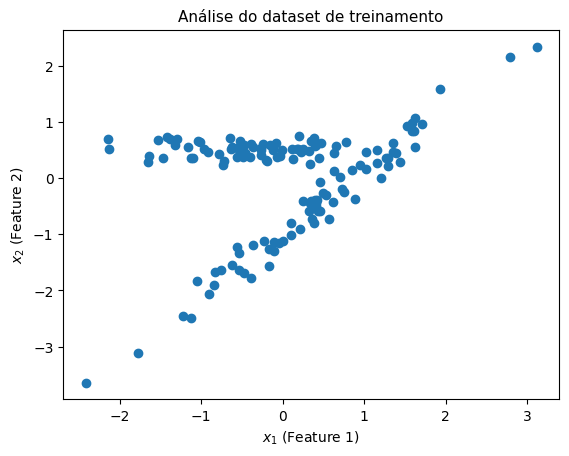

In [440]:
# Plot dos dados de treinamento
X_train_T = X_train.T
plt.scatter(X_train_T[0], X_train_T[1])
plt.xlabel('$x_1$ (Feature 1)', fontsize=10)
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title("Análise do dataset de treinamento", fontsize=11)
plt.show()

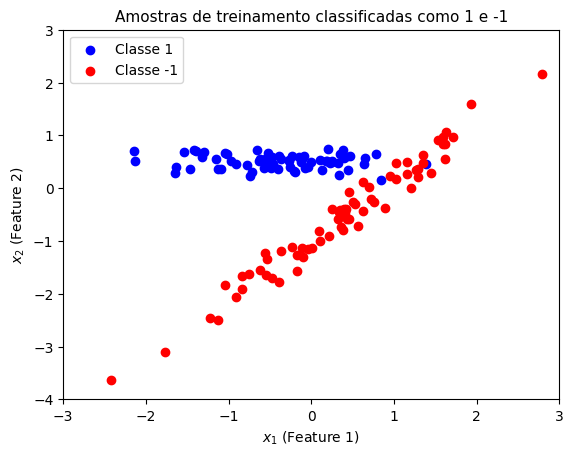

In [441]:
df_classe_1 = df_train_loaded[df_train_loaded['label'] == 1]            # amostras da classe 1
df_classe_menos_1 = df_train_loaded[df_train_loaded['label'] == -1]     # amostras da classe -1

X_classe_1_treino = df_classe_1.drop("label", axis=1).values.T                 # (n_features, n_amostras)
X_classe_menos_1_treino = df_classe_menos_1.drop("label", axis=1).values.T     # (n_features, n_amostras)

plt.scatter(X_classe_1_treino[0], X_classe_1_treino[1], color='blue', label='Classe 1')
plt.scatter(X_classe_menos_1_treino[0], X_classe_menos_1_treino[1], color='red', label='Classe -1')
plt.xlabel('$x_1$ (Feature 1)', fontsize=10)
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title("Amostras de treinamento classificadas como 1 e -1", fontsize=11)
plt.xlim(-3, 3)
plt.ylim(-4, 3)
plt.legend()
plt.show()

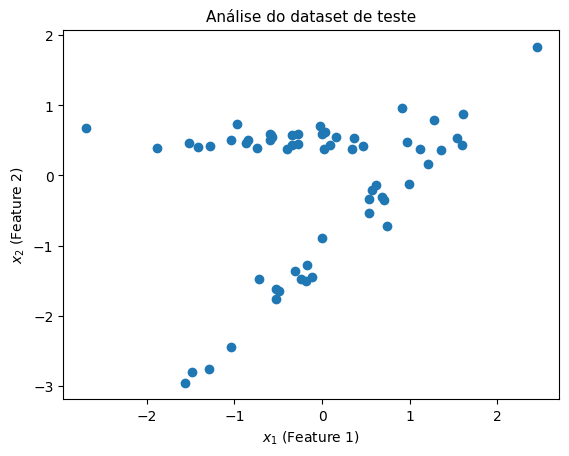

In [442]:
# Plot dos dados de teste
X_test_T = X_test.T
plt.scatter(X_test_T[0], X_test_T[1])
plt.xlabel('$x_1$ (Feature 1)', fontsize=10)
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title("Análise do dataset de teste", fontsize=11)
plt.show()

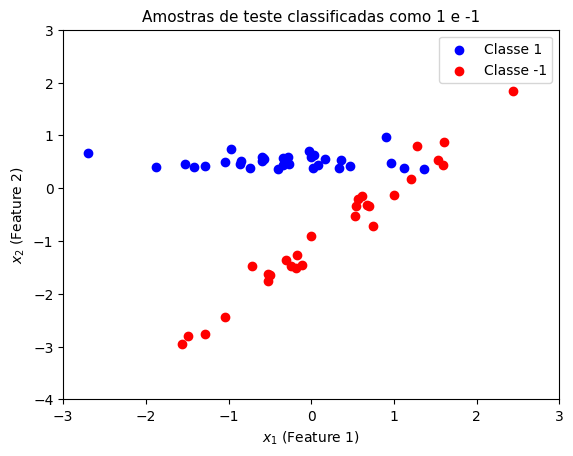

In [443]:
df_classe_1 = df_test_loaded[df_test_loaded['label'] == 1]            # amostras da classe 1
df_classe_menos_1 = df_test_loaded[df_test_loaded['label'] == -1]     # amostras da classe -1

X_classe_1_teste = df_classe_1.drop("label", axis=1).values.T                 # (n_features, n_amostras)
X_classe_menos_1_teste = df_classe_menos_1.drop("label", axis=1).values.T     # (n_features, n_amostras)

plt.scatter(X_classe_1_teste[0], X_classe_1_teste[1], color='blue', label='Classe 1')
plt.scatter(X_classe_menos_1_teste[0], X_classe_menos_1_teste[1], color='red', label='Classe -1')
plt.xlabel('$x_1$ (Feature 1)', fontsize=10)
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title("Amostras de teste classificadas como 1 e -1", fontsize=11)
plt.xlim(-3, 3)
plt.ylim(-4, 3)
plt.legend()
plt.show()

##### Treinando o Perceptron

In [444]:
qtd_atributos = X_train.shape[1]
tx_aprendizagem = 0.1
epocas = 100
seed = 16

resultado_treino = treinamento(X_train, y_train, qtd_atributos, tx_aprendizagem, epocas, seed)
pprint.pp(resultado_treino)

{'peso aprendido': array([ 0.52329108, -1.65293362,  1.55791257]),
 'epocas executadas': 100,
 'evolucao do erro': [0.12857142857142856,
                      0.06428571428571428,
                      0.07142857142857142,
                      0.02857142857142857,
                      0.04285714285714286,
                      0.02857142857142857,
                      0.02142857142857143,
                      0.02857142857142857,
                      0.05714285714285714,
                      0.03571428571428571,
                      0.04285714285714286,
                      0.03571428571428571,
                      0.02857142857142857,
                      0.06428571428571428,
                      0.03571428571428571,
                      0.02857142857142857,
                      0.05714285714285714,
                      0.05,
                      0.03571428571428571,
                      0.02142857142857143,
                      0.06428571428571428,
                  

##### Testando o Perceptron

In [445]:
resultado_teste = teste(X_test, y_test, resultado_treino["peso aprendido"])
pprint.pp(resultado_teste)

{'evolucao acuracia': [0.016666666666666666,
                       0.03333333333333333,
                       0.05,
                       0.06666666666666667,
                       0.08333333333333333,
                       0.1,
                       0.11666666666666667,
                       0.13333333333333333,
                       0.15,
                       0.16666666666666666,
                       0.18333333333333332,
                       0.2,
                       0.21666666666666667,
                       0.23333333333333334,
                       0.25,
                       0.26666666666666666,
                       0.2833333333333333,
                       0.3,
                       0.31666666666666665,
                       0.3333333333333333,
                       0.35,
                       0.36666666666666664,
                       0.38333333333333336,
                       0.38333333333333336,
                       0.4,
                       0.

##### Evolução do erro de treinamento em função das épocas

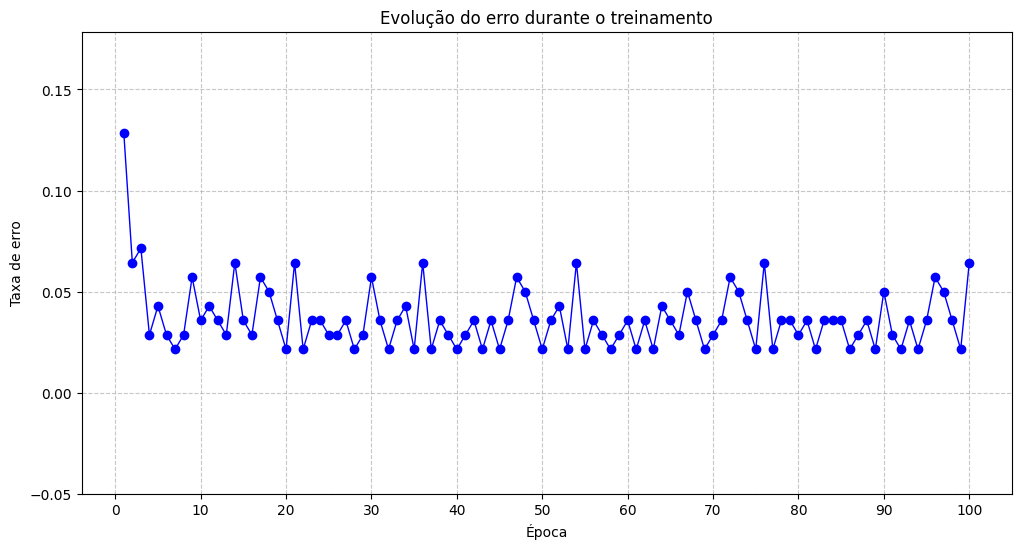

In [446]:
x = np.array(range(1, resultado_treino["epocas executadas"] + 1))
y = resultado_treino["evolucao do erro"]

plt.figure(figsize=(12, 6))
plt.plot(x, y, 'b-o', linewidth=1, markersize=5, markeredgewidth=2)
plt.title('Evolução do erro durante o treinamento', fontsize=12)
plt.xlabel('Época', fontsize=10)
plt.ylabel('Taxa de erro', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, max(x)+1, max(1, len(x)//10)))
plt.ylim(-0.05, min(1.05, max(y)+0.05))
plt.show()

##### Fronteira de decisão

É a reta que separa as duas classes classificadas pelo Perceptron.

Como temos dois atributos ($x_{1}$ e $x_{2}$), logo o potencial de ativação é dado por $u = x_{1} * w_{1} + x_{2} * w_{2} - \theta$. Asssumindo $x_{1}$ como $x$ e $x_{2}$ como $y$, a equação se parecerá com a equação geral da reta, dada por $A_{x} + B_{y} + C = 0$. Assim, podemos reordenar os termos e isolar $x_{2}$, obtendo $x_{2}$ = $\frac{\theta}{w_{2}} - \frac{w_{1}}{w_{2}}x_{1}$ ou $y$ = $\frac{\theta}{w_{2}} - \frac{w_{1}}{w_{2}}x$.

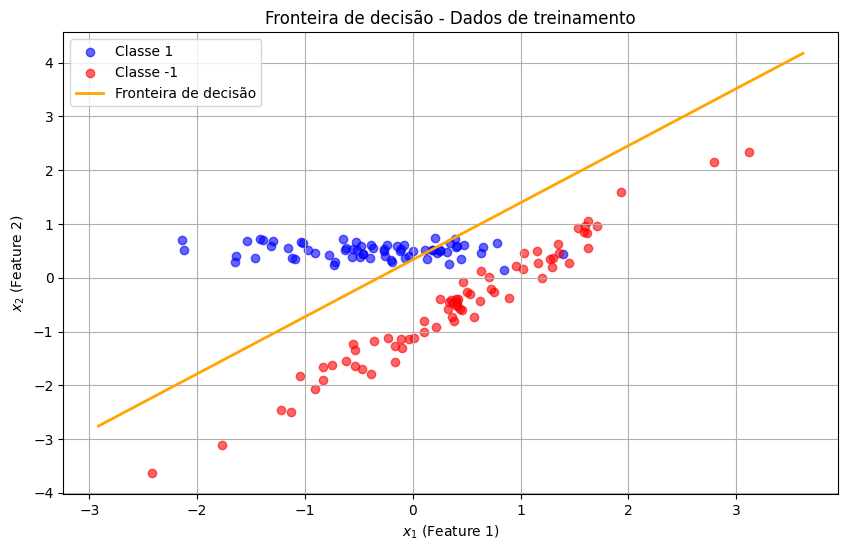

In [447]:
# Fronteira de decisão dos dados de treinamento
w1 = resultado_treino["peso aprendido"][1]
w2 = resultado_treino["peso aprendido"][2]
theta = resultado_treino["peso aprendido"][0]

x1_min, x1_max = X_train[:, 0].min(), X_train[:, 0].max()   # pega os pontos de mínimo e máximo
x1 = np.linspace(x1_min - 0.5, x1_max + 0.5, 100)           # pega 100 pontos dentro do mínimo e máximo
x2 = (theta / w2) - (w1 / w2) * x1                          # equação da fronteira de decisão

plt.figure(figsize=(10, 6))
plt.scatter(X_classe_1_treino[0], X_classe_1_treino[1], color='blue', label='Classe 1', alpha=0.6)
plt.scatter(X_classe_menos_1_treino[0], X_classe_menos_1_treino[1], color='red', label='Classe -1', alpha=0.6)
plt.plot(x1, x2, 'orange', linewidth=2, label='Fronteira de decisão')
plt.xlabel('$x_1$ (Feature 1)', fontsize=10)
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title('Fronteira de decisão - Dados de treinamento')
plt.legend()
plt.grid(True)
plt.show()

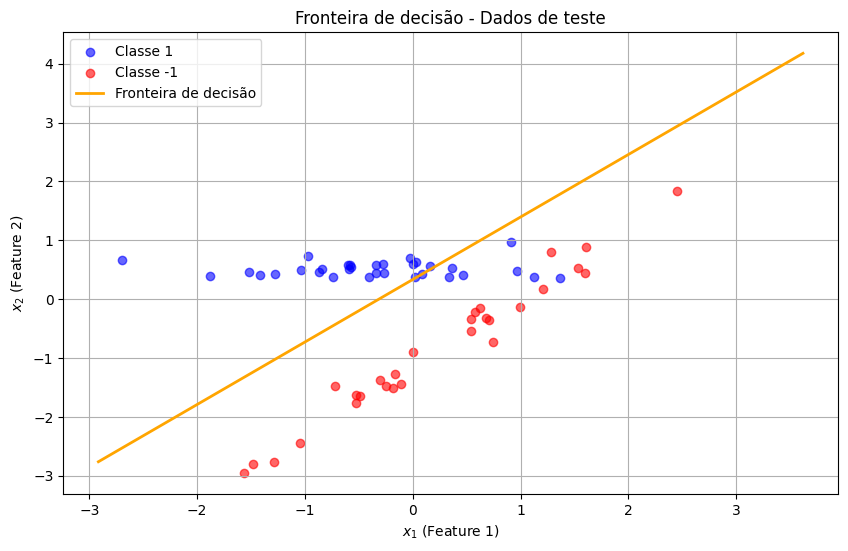

In [448]:
# Fronteira de decisão dos dados de teste
w1 = resultado_treino["peso aprendido"][1]
w2 = resultado_treino["peso aprendido"][2]
theta = resultado_treino["peso aprendido"][0]

x1_min, x1_max = X_train[:, 0].min(), X_train[:, 0].max()   # pega os pontos de mínimo e máximo
x1 = np.linspace(x1_min - 0.5, x1_max + 0.5, 100)           # pega 100 pontos dentro do mínimo e máximo
x2 = (theta / w2) - (w1 / w2) * x1                          # equação da fronteira de decisão

plt.figure(figsize=(10, 6))
plt.scatter(X_classe_1_teste[0], X_classe_1_teste[1], color='blue', label='Classe 1', alpha=0.6)
plt.scatter(X_classe_menos_1_teste[0], X_classe_menos_1_teste[1], color='red', label='Classe -1', alpha=0.6)
plt.plot(x1, x2, 'orange', linewidth=2, label='Fronteira de decisão')
plt.xlabel('$x_1$ (Feature 1)', fontsize=10)
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title('Fronteira de decisão - Dados de teste')
plt.legend()
plt.grid(True)
plt.show()

##### Resultados observados

- Tanto as amostras de treino quanto as de teste não são linearmente separáveis;
- Algumas amostras da Classe 1 estão "misturadas" nas amostras da Classe -1, podendo ser outliers;
- A razão de treinamento foi de 70% de dados de treino e 30% de dados de teste;
- O treinamento começou com ~13% de taxa de erro, variou bastante ao longo das épocas, mas finalizou com ~6% de taxa de erro;
- A acurácia dos dados de teste é ligeiramente maior porque, como a amostra de teste tem menos dados da Classe 1 que estão "misturados" com os dados da Classe -1, a relação entre acerto e total de amostra acaba sendo maior;
- De modo geral a rede atingiu bons resultados.

### Dataset #2

##### Carregando os arquivos CSV

In [449]:
# Carregando os datasets
df_train_loaded = pd.read_csv("arquivos_csv/train_dataset2.csv")
df_test_loaded = pd.read_csv("arquivos_csv/test_dataset2.csv")


# Separando os dados de treinamento
X_train = df_train_loaded.drop("label", axis=1).values      # (n_features, n_amostras)
y_train = df_train_loaded["label"].values.reshape(1, -1).T    # (1, n_amostras)

# Separando os dados de teste
X_test = df_test_loaded.drop("label", axis=1).values
y_test = df_test_loaded["label"].values.reshape(1, -1).T

##### Analisando o dataset

In [450]:
# Tamanho do dataset
print("Dataset de treino: ", df_train_loaded.shape)
print("Dataset de teste: ", df_test_loaded.shape)

Dataset de treino:  (175, 3)
Dataset de teste:  (75, 3)


In [451]:
# Razão de treino e teste
print("Razão de treino: ", df_train_loaded.shape[0]/(df_train_loaded.shape[0] + df_test_loaded.shape[0]))
print("Razão de teste: ", df_test_loaded.shape[0]/(df_train_loaded.shape[0] + df_test_loaded.shape[0]))

Razão de treino:  0.7
Razão de teste:  0.3


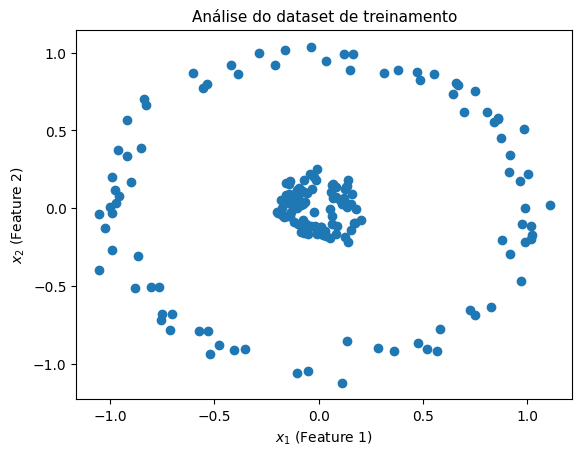

In [452]:
# Plot dos dados de treinamento
X_train_T = X_train.T
plt.scatter(X_train_T[0], X_train_T[1])
plt.xlabel('$x_1$ (Feature 1)', fontsize=10)
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title("Análise do dataset de treinamento", fontsize=11)
plt.show()

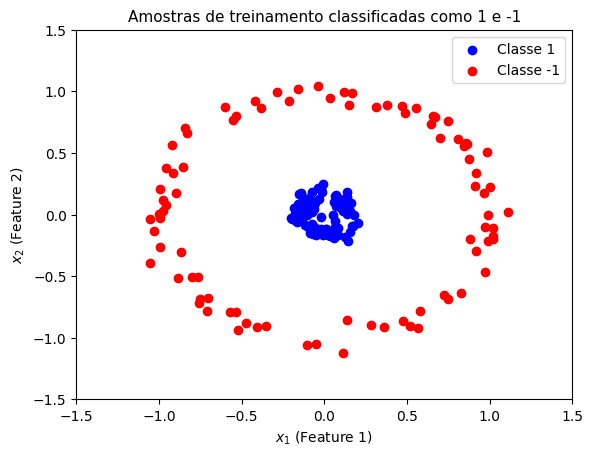

In [453]:
df_classe_1 = df_train_loaded[df_train_loaded['label'] == 1]            # amostras da classe 1
df_classe_menos_1 = df_train_loaded[df_train_loaded['label'] == -1]     # amostras da classe -1

X_classe_1_treino = df_classe_1.drop("label", axis=1).values.T                 # (n_features, n_amostras)
X_classe_menos_1_treino = df_classe_menos_1.drop("label", axis=1).values.T     # (n_features, n_amostras)

plt.scatter(X_classe_1_treino[0], X_classe_1_treino[1], color='blue', label='Classe 1')
plt.scatter(X_classe_menos_1_treino[0], X_classe_menos_1_treino[1], color='red', label='Classe -1')
plt.xlabel('$x_1$ (Feature 1)', fontsize=10)
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title("Amostras de treinamento classificadas como 1 e -1", fontsize=11)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()

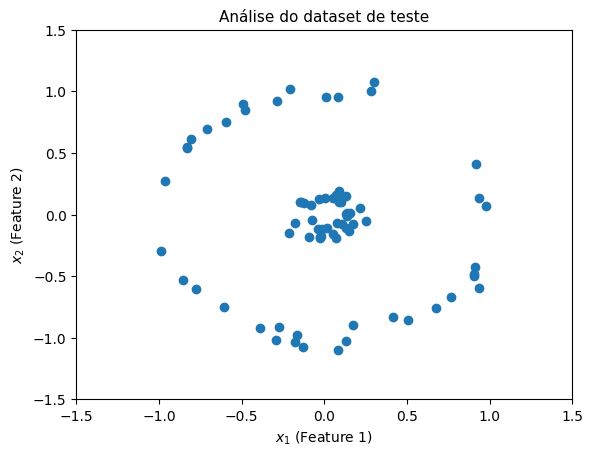

In [454]:
# Plot dos dados de teste
X_test_T = X_test.T
plt.scatter(X_test_T[0], X_test_T[1])
plt.xlabel('$x_1$ (Feature 1)', fontsize=10)
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title("Análise do dataset de teste", fontsize=11)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

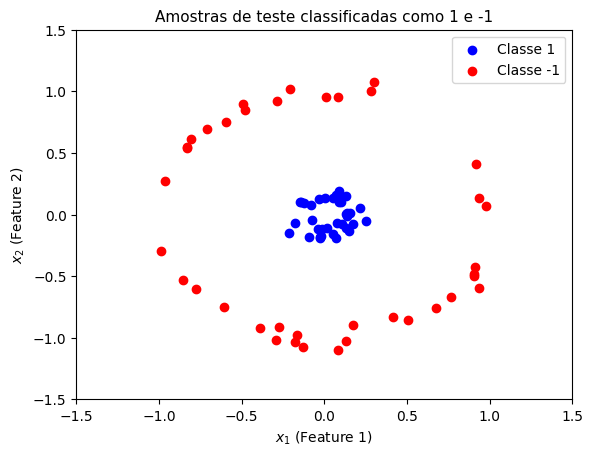

In [455]:
df_classe_1 = df_test_loaded[df_test_loaded['label'] == 1]            # amostras da classe 1
df_classe_menos_1 = df_test_loaded[df_test_loaded['label'] == -1]     # amostras da classe -1

X_classe_1_teste = df_classe_1.drop("label", axis=1).values.T                 # (n_features, n_amostras)
X_classe_menos_1_teste = df_classe_menos_1.drop("label", axis=1).values.T     # (n_features, n_amostras)

plt.scatter(X_classe_1_teste[0], X_classe_1_teste[1], color='blue', label='Classe 1')
plt.scatter(X_classe_menos_1_teste[0], X_classe_menos_1_teste[1], color='red', label='Classe -1')
plt.xlabel('$x_1$ (Feature 1)', fontsize=10)
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title("Amostras de teste classificadas como 1 e -1", fontsize=11)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()

##### Treinando o Perceptron

In [456]:
qtd_atributos = X_train.shape[1]
tx_aprendizagem = 0.1
epocas = 100
seed = 16

resultado_treino = treinamento(X_train, y_train, qtd_atributos, tx_aprendizagem, epocas, seed)
pprint.pp(resultado_treino)

{'peso aprendido': array([ 0.12329108,  0.2356349 , -0.05785355]),
 'epocas executadas': 100,
 'evolucao do erro': [0.5142857142857142,
                      0.5142857142857142,
                      0.5028571428571429,
                      0.5257142857142857,
                      0.5142857142857142,
                      0.5371428571428571,
                      0.5142857142857142,
                      0.5142857142857142,
                      0.5257142857142857,
                      0.5028571428571429,
                      0.5371428571428571,
                      0.5371428571428571,
                      0.5485714285714286,
                      0.5142857142857142,
                      0.5257142857142857,
                      0.5257142857142857,
                      0.5371428571428571,
                      0.5371428571428571,
                      0.5142857142857142,
                      0.5257142857142857,
                      0.5142857142857142,
                      0.

##### Testando o Perceptron

In [457]:
resultado_teste = teste(X_test, y_test, resultado_treino["peso aprendido"])
pprint.pp(resultado_teste)

{'evolucao acuracia': [0.013333333333333334,
                       0.013333333333333334,
                       0.013333333333333334,
                       0.02666666666666667,
                       0.04,
                       0.05333333333333334,
                       0.05333333333333334,
                       0.06666666666666667,
                       0.08,
                       0.08,
                       0.08,
                       0.08,
                       0.08,
                       0.08,
                       0.08,
                       0.09333333333333334,
                       0.10666666666666667,
                       0.10666666666666667,
                       0.12,
                       0.13333333333333333,
                       0.14666666666666667,
                       0.16,
                       0.16,
                       0.16,
                       0.17333333333333334,
                       0.18666666666666668,
                       0.2,
     

##### Evolução do erro de treinamento em função das épocas

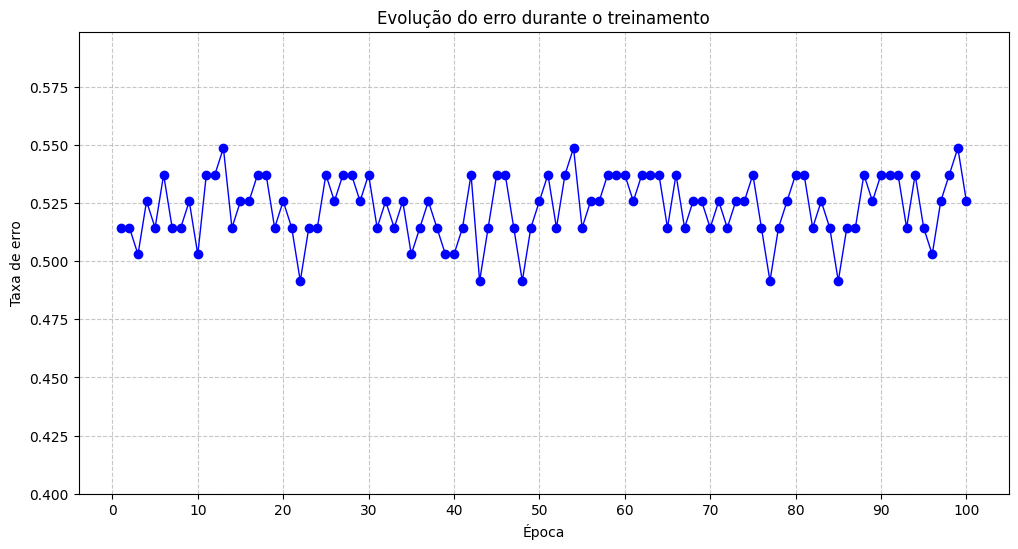

In [458]:
x = np.array(range(1, resultado_treino["epocas executadas"] + 1))
y = resultado_treino["evolucao do erro"]

plt.figure(figsize=(12, 6))
plt.plot(x, y, 'b-o', linewidth=1, markersize=5, markeredgewidth=2)
plt.title('Evolução do erro durante o treinamento', fontsize=12)
plt.xlabel('Época', fontsize=10)
plt.ylabel('Taxa de erro', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, max(x)+1, max(1, len(x)//10)))
plt.ylim(0.4, min(1.05, max(y)+0.05))
plt.show()

##### Fronteira de decisão

É a reta que separa as duas classes classificadas pelo Perceptron.

Como temos dois atributos ($x_{1}$ e $x_{2}$), logo o potencial de ativação é dado por $u = x_{1} * w_{1} + x_{2} * w_{2} - \theta$. Asssumindo $x_{1}$ como $x$ e $x_{2}$ como $y$, a equação se parecerá com a equação geral da reta, dada por $A_{x} + B_{y} + C = 0$. Assim, podemos reordenar os termos e isolar $x_{2}$, obtendo $x_{2}$ = $\frac{\theta}{w_{2}} - \frac{w_{1}}{w_{2}}x_{1}$ ou $y$ = $\frac{\theta}{w_{2}} - \frac{w_{1}}{w_{2}}x$.

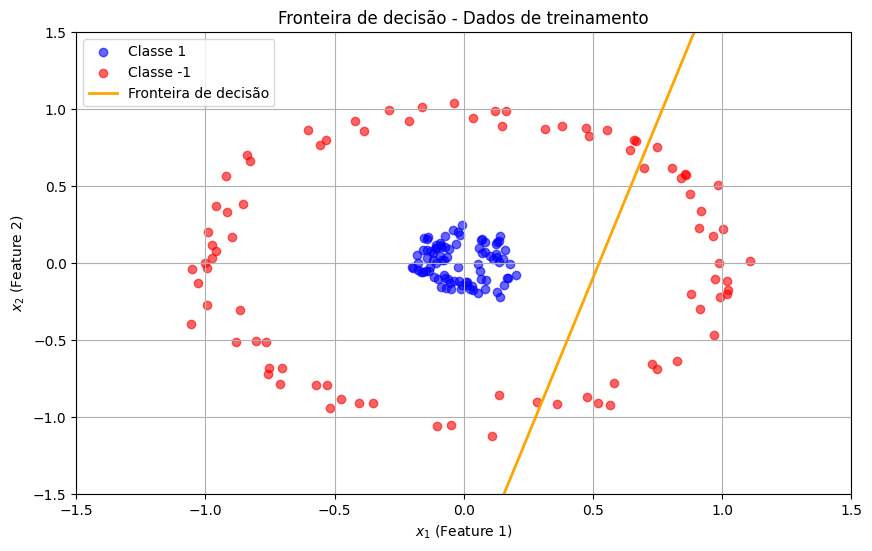

In [459]:
# Fronteira de decisão dos dados de treinamento
w1 = resultado_treino["peso aprendido"][1]
w2 = resultado_treino["peso aprendido"][2]
theta = resultado_treino["peso aprendido"][0]

x1_min, x1_max = X_train[:, 0].min(), X_train[:, 0].max()   # pega os pontos de mínimo e máximo
x1 = np.linspace(x1_min - 0.5, x1_max + 0.5, 100)           # pega 100 pontos dentro do mínimo e máximo
x2 = (theta / w2) - (w1 / w2) * x1                          # equação da fronteira de decisão

plt.figure(figsize=(10, 6))
plt.scatter(X_classe_1_treino[0], X_classe_1_treino[1], color='blue', label='Classe 1', alpha=0.6)
plt.scatter(X_classe_menos_1_treino[0], X_classe_menos_1_treino[1], color='red', label='Classe -1', alpha=0.6)
plt.plot(x1, x2, 'orange', linewidth=2, label='Fronteira de decisão')
plt.xlabel('$x_1$ (Feature 1)', fontsize=10)
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title('Fronteira de decisão - Dados de treinamento')
plt.legend()
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.show()

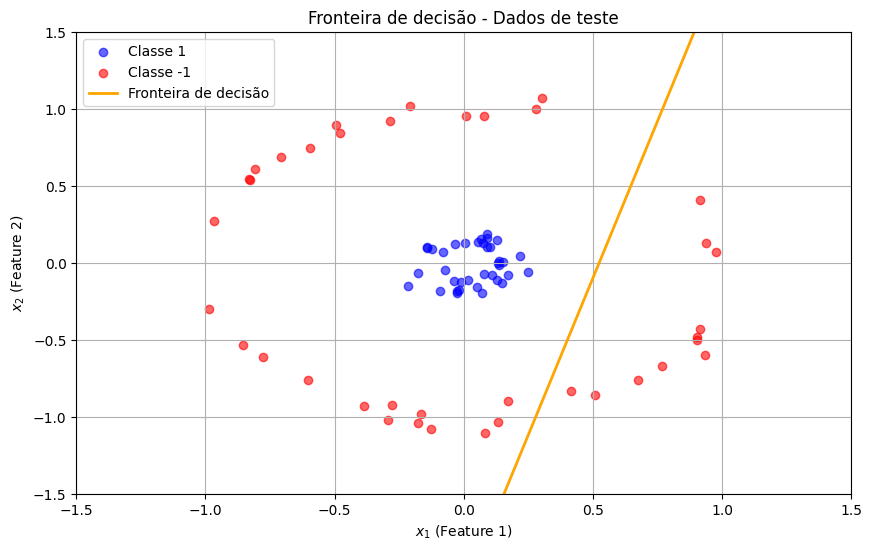

In [460]:
# Fronteira de decisão dos dados de teste
w1 = resultado_treino["peso aprendido"][1]
w2 = resultado_treino["peso aprendido"][2]
theta = resultado_treino["peso aprendido"][0]

x1_min, x1_max = X_train[:, 0].min(), X_train[:, 0].max()   # pega os pontos de mínimo e máximo
x1 = np.linspace(x1_min - 0.5, x1_max + 0.5, 100)           # pega 100 pontos dentro do mínimo e máximo
x2 = (theta / w2) - (w1 / w2) * x1                          # equação da fronteira de decisão

plt.figure(figsize=(10, 6))
plt.scatter(X_classe_1_teste[0], X_classe_1_teste[1], color='blue', label='Classe 1', alpha=0.6)
plt.scatter(X_classe_menos_1_teste[0], X_classe_menos_1_teste[1], color='red', label='Classe -1', alpha=0.6)
plt.plot(x1, x2, 'orange', linewidth=2, label='Fronteira de decisão')
plt.xlabel('$x_1$ (Feature 1)', fontsize=10)
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title('Fronteira de decisão - Dados de teste')
plt.legend()
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.show()

##### Resultados observados

- Apesar das classes estarem perfeitamente separadas, são círculos concêntricos, tornando as amostras não linearmente separáveis;
- A razão de treinamento foi de 70% de dados de treino e 30% de dados de teste;
- O treinamento começou com ~51% de taxa de erro, variou bastante ao longo das épocas, mas finalizou com ~52,5% de taxa de erro, ou seja, o modelo não conseguiu aprender nada durante as épocas;
- A acurácia de treino de ~50% representa um "chute" que o modelo fez;
- A acurácia de teste foi de 64%, o que pode representar uma divisão errada entre treino e teste ou é simplesmente porque não existe tantas amostras próximas à fronteira.

### Dataset #3

##### Carregando os arquivos CSV

In [461]:
# Carregando os datasets
df_train_loaded = pd.read_csv("arquivos_csv/train_dataset3.csv")
df_test_loaded = pd.read_csv("arquivos_csv/test_dataset3.csv")


# Separando os dados de treinamento
X_train = df_train_loaded.drop("label", axis=1).values      # (n_features, n_amostras)
y_train = df_train_loaded["label"].values.reshape(1, -1).T    # (1, n_amostras)

# Separando os dados de teste
X_test = df_test_loaded.drop("label", axis=1).values
y_test = df_test_loaded["label"].values.reshape(1, -1).T

##### Analisando o dataset

In [462]:
# Tamanho do dataset
print("Dataset de treino: ", df_train_loaded.shape)
print("Dataset de teste: ", df_test_loaded.shape)

Dataset de treino:  (147, 11)
Dataset de teste:  (63, 11)


In [463]:
# Razão de treino e teste
print("Razão de treino: ", df_train_loaded.shape[0]/(df_train_loaded.shape[0] + df_test_loaded.shape[0]))
print("Razão de teste: ", df_test_loaded.shape[0]/(df_train_loaded.shape[0] + df_test_loaded.shape[0]))

Razão de treino:  0.7
Razão de teste:  0.3


#### Treinando o Perceptron com 100 épocas e $\eta$ = 0.1

In [468]:
qtd_atributos = X_train.shape[1]
tx_aprendizagem = 0.1
epocas = 100
seed = 16

resultado_treino_1 = treinamento(X_train, y_train, qtd_atributos, tx_aprendizagem, epocas, seed)
pprint.pp(resultado_treino_1)

{'peso aprendido': array([ 0.12329108,  0.22240085, -0.51951339, -0.34300337, -0.33135553,
        0.19781674,  0.05304559,  0.19513071,  0.44589497, -0.06791023,
        2.54786382]),
 'epocas executadas': 100,
 'evolucao do erro': [0.1292517006802721,
                      0.10884353741496598,
                      0.10884353741496598,
                      0.10204081632653061,
                      0.09523809523809523,
                      0.1360544217687075,
                      0.1360544217687075,
                      0.09523809523809523,
                      0.08163265306122448,
                      0.10204081632653061,
                      0.08163265306122448,
                      0.10884353741496598,
                      0.08163265306122448,
                      0.12244897959183673,
                      0.10204081632653061,
                      0.09523809523809523,
                      0.08843537414965986,
                      0.10884353741496598,
                 

##### Acurácia e desvio padrão no treinamento do Perceptron

In [469]:
evolucao_acuracia = resultado_treino_1['evolucao acuracia']
acuracia = resultado_treino_1['acuracia']
stdev_acuracia = statistics.stdev(evolucao_acuracia)

print(f"Acurácia de {acuracia:.3%} com desvio padrão de {stdev_acuracia:.3}")

Acurácia de 89.116% com desvio padrão de 0.0155


##### Evolução do erro de treinamento em função das épocas

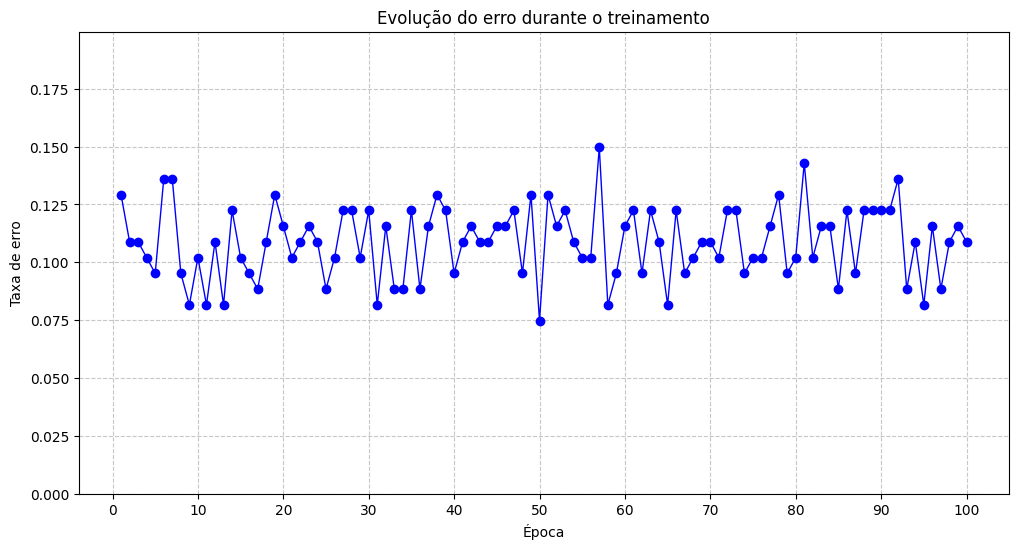

In [470]:
x = np.array(range(1, resultado_treino_1["epocas executadas"] + 1))
y = resultado_treino_1["evolucao do erro"]

plt.figure(figsize=(12, 6))
plt.plot(x, y, 'b-o', linewidth=1, markersize=5, markeredgewidth=2)
plt.title('Evolução do erro durante o treinamento', fontsize=12)
plt.xlabel('Época', fontsize=10)
plt.ylabel('Taxa de erro', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, max(x)+1, max(1, len(x)//10)))
plt.ylim(0, min(1.05, max(y)+0.05))
plt.show()

##### Testando o Perceptron

In [471]:
resultado_teste_1 = teste(X_test, y_test, resultado_treino_1["peso aprendido"])
pprint.pp(resultado_teste_1)

{'evolucao acuracia': [0.015873015873015872,
                       0.031746031746031744,
                       0.047619047619047616,
                       0.06349206349206349,
                       0.07936507936507936,
                       0.09523809523809523,
                       0.1111111111111111,
                       0.12698412698412698,
                       0.14285714285714285,
                       0.15873015873015872,
                       0.1746031746031746,
                       0.1746031746031746,
                       0.19047619047619047,
                       0.20634920634920634,
                       0.2222222222222222,
                       0.23809523809523808,
                       0.23809523809523808,
                       0.25396825396825395,
                       0.2698412698412698,
                       0.2857142857142857,
                       0.30158730158730157,
                       0.31746031746031744,
                       0.3333333333

##### Acurácia e desvio padrão no teste do Perceptron

In [472]:
evolucao_acuracia = resultado_teste_1['evolucao acuracia']
acuracia = resultado_teste_1['acuracia']
stdev_acuracia = statistics.stdev(evolucao_acuracia)

print(f"Acurácia de {acuracia:.3%} com desvio padrão de {stdev_acuracia:.3}")

Acurácia de 85.714% com desvio padrão de 0.236


#### Treinando o Perceptron com 100 épocas e $\eta$ = 0.001

In [473]:
qtd_atributos = X_train.shape[1]
tx_aprendizagem = 0.001
epocas = 100
seed = 16

resultado_treino_2 = treinamento(X_train, y_train, qtd_atributos, tx_aprendizagem, epocas, seed)
pprint.pp(resultado_treino_2)

{'peso aprendido': array([ 0.00329108,  0.00040442, -0.00448086, -0.00478905, -0.00440738,
        0.00473278, -0.0007246 ,  0.00220747,  0.00913174, -0.00154844,
        0.02383184]),
 'epocas executadas': 100,
 'evolucao do erro': [0.4013605442176871,
                      0.38095238095238093,
                      0.2925170068027211,
                      0.21768707482993196,
                      0.19047619047619047,
                      0.16326530612244897,
                      0.1292517006802721,
                      0.12244897959183673,
                      0.12244897959183673,
                      0.12244897959183673,
                      0.10204081632653061,
                      0.09523809523809523,
                      0.08163265306122448,
                      0.08163265306122448,
                      0.09523809523809523,
                      0.08843537414965986,
                      0.08163265306122448,
                      0.08163265306122448,
                 

##### Acurácia e desvio padrão no treinamento do Perceptron

In [474]:
evolucao_acuracia = resultado_treino_2['evolucao acuracia']
acuracia = resultado_treino_2['acuracia']
stdev_acuracia = statistics.stdev(evolucao_acuracia)

print(f"Acurácia de {acuracia:.3%} com desvio padrão de {stdev_acuracia:.3}")

Acurácia de 86.395% com desvio padrão de 0.0512


##### Evolução do erro de treinamento em função das épocas

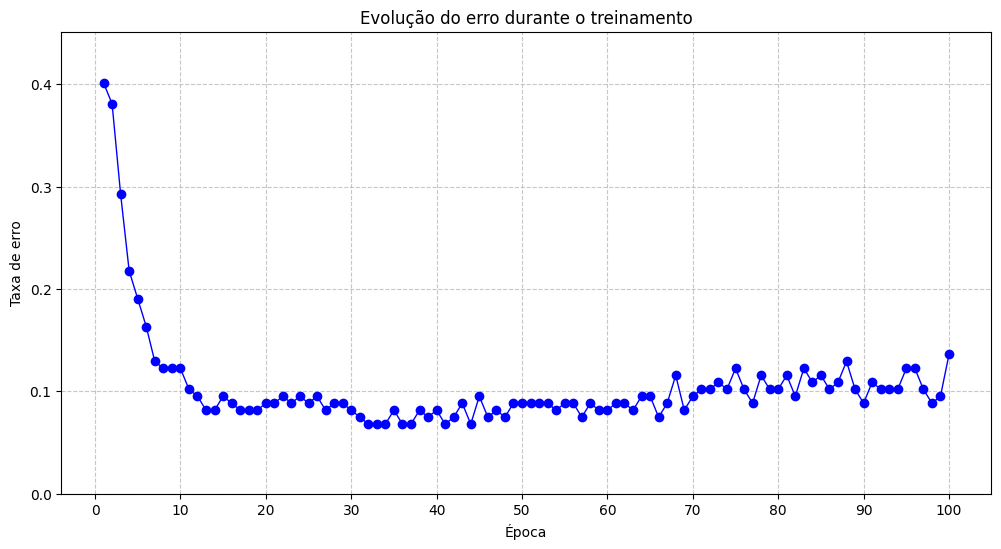

In [475]:
x = np.array(range(1, resultado_treino_2["epocas executadas"] + 1))
y = resultado_treino_2["evolucao do erro"]

plt.figure(figsize=(12, 6))
plt.plot(x, y, 'b-o', linewidth=1, markersize=5, markeredgewidth=2)
plt.title('Evolução do erro durante o treinamento', fontsize=12)
plt.xlabel('Época', fontsize=10)
plt.ylabel('Taxa de erro', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, max(x)+1, max(1, len(x)//10)))
plt.ylim(0, min(1.05, max(y)+0.05))
plt.show()

##### Testando o Perceptron

In [476]:
resultado_teste_2 = teste(X_test, y_test, resultado_treino_2["peso aprendido"])
pprint.pp(resultado_teste_2)

{'evolucao acuracia': [0.015873015873015872,
                       0.015873015873015872,
                       0.031746031746031744,
                       0.047619047619047616,
                       0.06349206349206349,
                       0.07936507936507936,
                       0.07936507936507936,
                       0.09523809523809523,
                       0.1111111111111111,
                       0.12698412698412698,
                       0.14285714285714285,
                       0.14285714285714285,
                       0.15873015873015872,
                       0.1746031746031746,
                       0.19047619047619047,
                       0.20634920634920634,
                       0.20634920634920634,
                       0.2222222222222222,
                       0.23809523809523808,
                       0.25396825396825395,
                       0.2698412698412698,
                       0.2857142857142857,
                       0.30158730

##### Acurácia e desvio padrão no teste do Perceptron

In [477]:
evolucao_acuracia = resultado_teste_2['evolucao acuracia']
acuracia = resultado_teste_2['acuracia']
stdev_acuracia = statistics.stdev(evolucao_acuracia)

print(f"Acurácia de {acuracia:.3%} com desvio padrão de {stdev_acuracia:.3}")

Acurácia de 84.127% com desvio padrão de 0.242


#### Treinando o Perceptron com 100 épocas e $\eta$ = 0.0001

In [478]:
qtd_atributos = X_train.shape[1]
tx_aprendizagem = 0.0001
epocas = 100
seed = 16

resultado_treino_3 = treinamento(X_train, y_train, qtd_atributos, tx_aprendizagem, epocas, seed)
pprint.pp(resultado_treino_3)

{'peso aprendido': array([-0.09910892, -0.03373379, -0.11498035, -0.15776824, -0.0554045 ,
       -0.10420841,  0.12169012, -0.05038151, -0.11355404,  0.0438465 ,
        0.41469504]),
 'epocas executadas': 100,
 'evolucao do erro': [0.4421768707482993,
                      0.43537414965986393,
                      0.42857142857142855,
                      0.4013605442176871,
                      0.4013605442176871,
                      0.3945578231292517,
                      0.38095238095238093,
                      0.38095238095238093,
                      0.38095238095238093,
                      0.3741496598639456,
                      0.3673469387755102,
                      0.3673469387755102,
                      0.36054421768707484,
                      0.36054421768707484,
                      0.36054421768707484,
                      0.36054421768707484,
                      0.36054421768707484,
                      0.3469387755102041,
                      

##### Acurácia e desvio padrão no treinamento do Perceptron

In [479]:
evolucao_acuracia = resultado_treino_3['evolucao acuracia']
acuracia = resultado_treino_3['acuracia']
stdev_acuracia = statistics.stdev(evolucao_acuracia)

print(f"Acurácia de {acuracia:.3%} com desvio padrão de {stdev_acuracia:.3}")

Acurácia de 88.435% com desvio padrão de 0.0982


##### Evolução do erro de treinamento em função das épocas

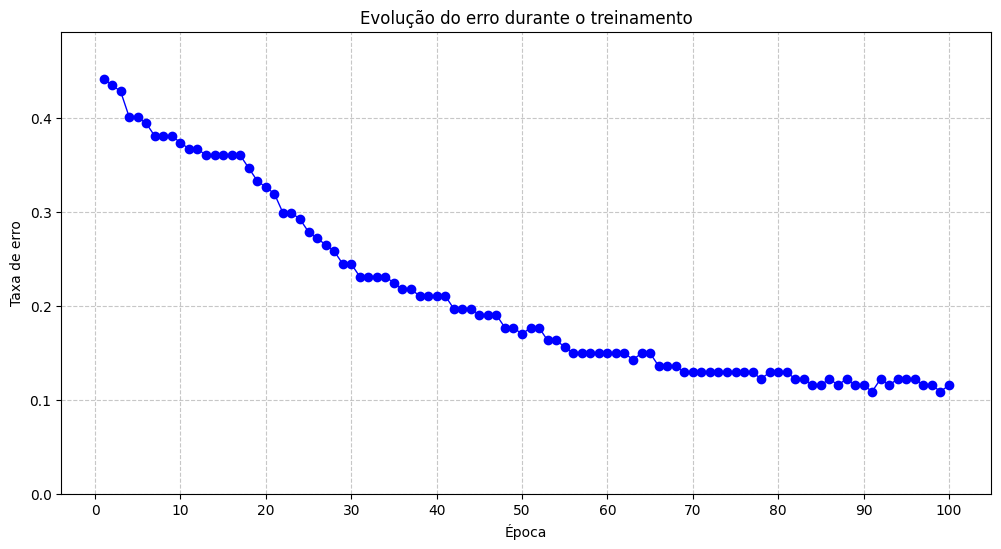

In [480]:
x = np.array(range(1, resultado_treino_3["epocas executadas"] + 1))
y = resultado_treino_3["evolucao do erro"]

plt.figure(figsize=(12, 6))
plt.plot(x, y, 'b-o', linewidth=1, markersize=5, markeredgewidth=2)
plt.title('Evolução do erro durante o treinamento', fontsize=12)
plt.xlabel('Época', fontsize=10)
plt.ylabel('Taxa de erro', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, max(x)+1, max(1, len(x)//10)))
plt.ylim(0, min(1.05, max(y)+0.05))
plt.show()

##### Testando o Perceptron

In [481]:
resultado_teste_3 = teste(X_test, y_test, resultado_treino_3["peso aprendido"])
pprint.pp(resultado_teste_3)

{'evolucao acuracia': [0.015873015873015872,
                       0.015873015873015872,
                       0.015873015873015872,
                       0.031746031746031744,
                       0.047619047619047616,
                       0.06349206349206349,
                       0.07936507936507936,
                       0.09523809523809523,
                       0.1111111111111111,
                       0.12698412698412698,
                       0.14285714285714285,
                       0.14285714285714285,
                       0.15873015873015872,
                       0.1746031746031746,
                       0.1746031746031746,
                       0.19047619047619047,
                       0.19047619047619047,
                       0.20634920634920634,
                       0.2222222222222222,
                       0.23809523809523808,
                       0.25396825396825395,
                       0.2698412698412698,
                       0.2857142

##### Acurácia e desvio padrão no teste do Perceptron

In [482]:
evolucao_acuracia = resultado_teste_3['evolucao acuracia']
acuracia = resultado_teste_3['acuracia']
stdev_acuracia = statistics.stdev(evolucao_acuracia)

print(f"Acurácia de {acuracia:.3%} com desvio padrão de {stdev_acuracia:.3}")

Acurácia de 77.778% com desvio padrão de 0.222


#### Treinando o Perceptron com 200 épocas e $\eta$ = 0.1

In [483]:
qtd_atributos = X_train.shape[1]
tx_aprendizagem = 0.1
epocas = 200
seed = 16

resultado_treino_4 = treinamento(X_train, y_train, qtd_atributos, tx_aprendizagem, epocas, seed)
pprint.pp(resultado_treino_4)

{'peso aprendido': array([ 0.12329108,  0.05015814, -0.13628675, -0.09156599, -0.54528051,
        0.52591716, -0.18388711, -0.12021561,  0.36520816, -0.35686678,
        2.53625682]),
 'epocas executadas': 200,
 'evolucao do erro': [0.1292517006802721,
                      0.10884353741496598,
                      0.10884353741496598,
                      0.10204081632653061,
                      0.09523809523809523,
                      0.1360544217687075,
                      0.1360544217687075,
                      0.09523809523809523,
                      0.08163265306122448,
                      0.10204081632653061,
                      0.08163265306122448,
                      0.10884353741496598,
                      0.08163265306122448,
                      0.12244897959183673,
                      0.10204081632653061,
                      0.09523809523809523,
                      0.08843537414965986,
                      0.10884353741496598,
                 

##### Acurácia e desvio padrão no treinamento do Perceptron

In [484]:
evolucao_acuracia = resultado_treino_4['evolucao acuracia']
acuracia = resultado_treino_4['acuracia']
stdev_acuracia = statistics.stdev(evolucao_acuracia)

print(f"Acurácia de {acuracia:.3%} com desvio padrão de {stdev_acuracia:.3}")

Acurácia de 87.755% com desvio padrão de 0.0148


##### Evolução do erro de treinamento em função das épocas

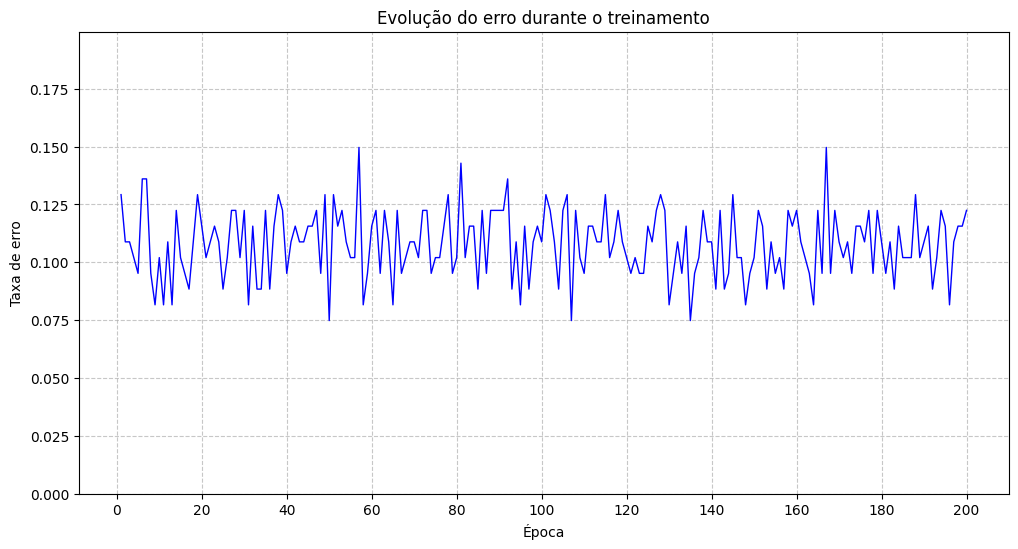

In [493]:
x = np.array(range(1, resultado_treino_4["epocas executadas"] + 1))
y = resultado_treino_4["evolucao do erro"]

plt.figure(figsize=(12, 6))
plt.plot(x, y, 'b', linewidth=1, markersize=5, markeredgewidth=2)
plt.title('Evolução do erro durante o treinamento', fontsize=12)
plt.xlabel('Época', fontsize=10)
plt.ylabel('Taxa de erro', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, max(x)+1, max(1, len(x)//10)))
plt.ylim(0, min(1.05, max(y)+0.05))
plt.show()

##### Testando o Perceptron

In [486]:
resultado_teste_4 = teste(X_test, y_test, resultado_treino_4["peso aprendido"])
pprint.pp(resultado_teste_4)

{'evolucao acuracia': [0.015873015873015872,
                       0.031746031746031744,
                       0.047619047619047616,
                       0.06349206349206349,
                       0.07936507936507936,
                       0.09523809523809523,
                       0.09523809523809523,
                       0.1111111111111111,
                       0.12698412698412698,
                       0.14285714285714285,
                       0.15873015873015872,
                       0.15873015873015872,
                       0.1746031746031746,
                       0.19047619047619047,
                       0.20634920634920634,
                       0.2222222222222222,
                       0.2222222222222222,
                       0.23809523809523808,
                       0.25396825396825395,
                       0.2698412698412698,
                       0.2857142857142857,
                       0.30158730158730157,
                       0.3174603174

##### Acurácia e desvio padrão no teste do Perceptron

In [488]:
evolucao_acuracia = resultado_teste_4['evolucao acuracia']
acuracia = resultado_teste_4['acuracia']
stdev_acuracia = statistics.stdev(evolucao_acuracia)

print(f"Acurácia de {acuracia:.3%} com desvio padrão de {stdev_acuracia:.3}")

Acurácia de 84.127% com desvio padrão de 0.235


#### Treinando o Perceptron com 200 épocas e $\eta$ = 0.001

In [489]:
qtd_atributos = X_train.shape[1]
tx_aprendizagem = 0.001
epocas = 200
seed = 16

resultado_treino_5 = treinamento(X_train, y_train, qtd_atributos, tx_aprendizagem, epocas, seed)
pprint.pp(resultado_treino_5)

{'peso aprendido': array([ 0.00129108,  0.00113857, -0.00016597, -0.00348106, -0.00549461,
        0.00389521, -0.00100368,  0.00037302,  0.00401632,  0.00151141,
        0.02135291]),
 'epocas executadas': 200,
 'evolucao do erro': [0.4013605442176871,
                      0.38095238095238093,
                      0.2925170068027211,
                      0.21768707482993196,
                      0.19047619047619047,
                      0.16326530612244897,
                      0.1292517006802721,
                      0.12244897959183673,
                      0.12244897959183673,
                      0.12244897959183673,
                      0.10204081632653061,
                      0.09523809523809523,
                      0.08163265306122448,
                      0.08163265306122448,
                      0.09523809523809523,
                      0.08843537414965986,
                      0.08163265306122448,
                      0.08163265306122448,
                 

##### Acurácia e desvio padrão no treinamento do Perceptron

In [490]:
evolucao_acuracia = resultado_treino_5['evolucao acuracia']
acuracia = resultado_treino_5['acuracia']
stdev_acuracia = statistics.stdev(evolucao_acuracia)

print(f"Acurácia de {acuracia:.3%} com desvio padrão de {stdev_acuracia:.3}")

Acurácia de 89.116% com desvio padrão de 0.0373


##### Evolução do erro de treinamento em função das épocas

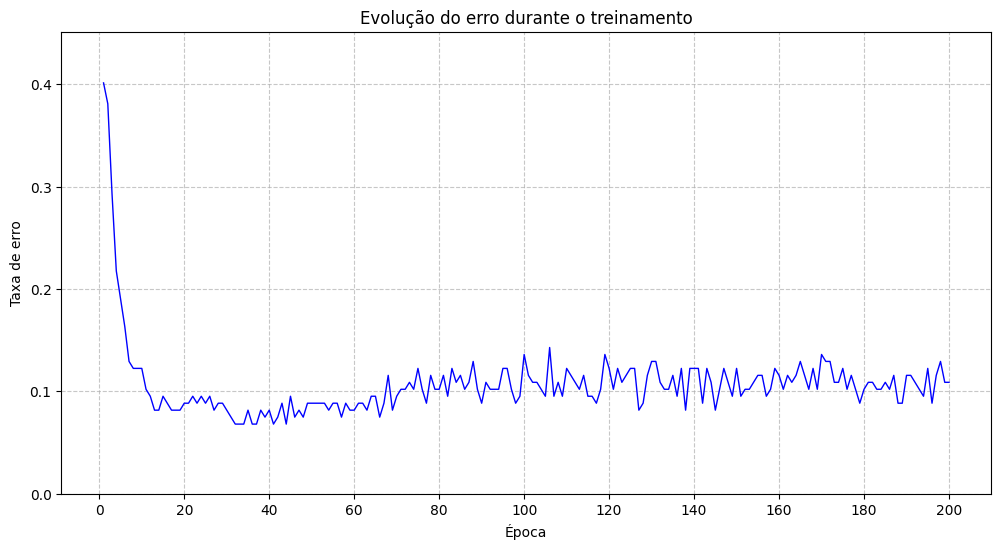

In [492]:
x = np.array(range(1, resultado_treino_5["epocas executadas"] + 1))
y = resultado_treino_5["evolucao do erro"]

plt.figure(figsize=(12, 6))
plt.plot(x, y, 'b', linewidth=1, markersize=5, markeredgewidth=2)
plt.title('Evolução do erro durante o treinamento', fontsize=12)
plt.xlabel('Época', fontsize=10)
plt.ylabel('Taxa de erro', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, max(x)+1, max(1, len(x)//10)))
plt.ylim(0, min(1.05, max(y)+0.05))
plt.show()

##### Testando o Perceptron

In [494]:
resultado_teste_5 = teste(X_test, y_test, resultado_treino_5["peso aprendido"])
pprint.pp(resultado_teste_5)

{'evolucao acuracia': [0.015873015873015872,
                       0.031746031746031744,
                       0.031746031746031744,
                       0.047619047619047616,
                       0.06349206349206349,
                       0.07936507936507936,
                       0.07936507936507936,
                       0.09523809523809523,
                       0.1111111111111111,
                       0.12698412698412698,
                       0.14285714285714285,
                       0.14285714285714285,
                       0.15873015873015872,
                       0.1746031746031746,
                       0.19047619047619047,
                       0.20634920634920634,
                       0.20634920634920634,
                       0.2222222222222222,
                       0.23809523809523808,
                       0.25396825396825395,
                       0.2698412698412698,
                       0.2857142857142857,
                       0.30158730

##### Acurácia e desvio padrão no teste do Perceptron

In [495]:
evolucao_acuracia = resultado_teste_5['evolucao acuracia']
acuracia = resultado_teste_5['acuracia']
stdev_acuracia = statistics.stdev(evolucao_acuracia)

print(f"Acurácia de {acuracia:.3%} com desvio padrão de {stdev_acuracia:.3}")

Acurácia de 87.302% com desvio padrão de 0.253


#### Treinando o Perceptron com 200 épocas e $\eta$ = 0.0001

In [499]:
qtd_atributos = X_train.shape[1]
tx_aprendizagem = 0.0001
epocas = 200
seed = 16

resultado_treino_6 = treinamento(X_train, y_train, qtd_atributos, tx_aprendizagem, epocas, seed)
pprint.pp(resultado_treino_6)

{'peso aprendido': array([-0.03970892, -0.00871276, -0.08231789, -0.11584132, -0.06624607,
       -0.02806717,  0.06654382,  0.00082485,  0.00123671, -0.00753183,
        0.33048101]),
 'epocas executadas': 200,
 'evolucao do erro': [0.4421768707482993,
                      0.43537414965986393,
                      0.42857142857142855,
                      0.4013605442176871,
                      0.4013605442176871,
                      0.3945578231292517,
                      0.38095238095238093,
                      0.38095238095238093,
                      0.38095238095238093,
                      0.3741496598639456,
                      0.3673469387755102,
                      0.3673469387755102,
                      0.36054421768707484,
                      0.36054421768707484,
                      0.36054421768707484,
                      0.36054421768707484,
                      0.36054421768707484,
                      0.3469387755102041,
                      

##### Acurácia e desvio padrão no treinamento do Perceptron

In [500]:
evolucao_acuracia = resultado_treino_6['evolucao acuracia']
acuracia = resultado_treino_6['acuracia']
stdev_acuracia = statistics.stdev(evolucao_acuracia)

print(f"Acurácia de {acuracia:.3%} com desvio padrão de {stdev_acuracia:.3}")

Acurácia de 91.837% com desvio padrão de 0.0925


##### Evolução do erro de treinamento em função das épocas

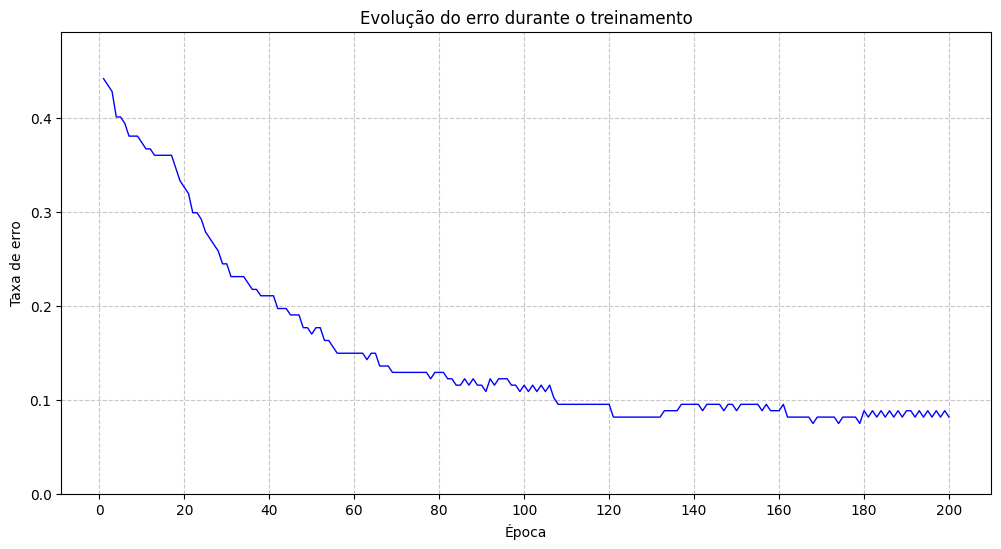

In [501]:
x = np.array(range(1, resultado_treino_6["epocas executadas"] + 1))
y = resultado_treino_6["evolucao do erro"]

plt.figure(figsize=(12, 6))
plt.plot(x, y, 'b', linewidth=1, markersize=5, markeredgewidth=2)
plt.title('Evolução do erro durante o treinamento', fontsize=12)
plt.xlabel('Época', fontsize=10)
plt.ylabel('Taxa de erro', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, max(x)+1, max(1, len(x)//10)))
plt.ylim(0, min(1.05, max(y)+0.05))
plt.show()

##### Testando o Perceptron

In [502]:
resultado_teste_6 = teste(X_test, y_test, resultado_treino_6["peso aprendido"])
pprint.pp(resultado_teste_6)

{'evolucao acuracia': [0.015873015873015872,
                       0.015873015873015872,
                       0.015873015873015872,
                       0.031746031746031744,
                       0.047619047619047616,
                       0.06349206349206349,
                       0.07936507936507936,
                       0.09523809523809523,
                       0.1111111111111111,
                       0.12698412698412698,
                       0.14285714285714285,
                       0.14285714285714285,
                       0.15873015873015872,
                       0.1746031746031746,
                       0.19047619047619047,
                       0.20634920634920634,
                       0.20634920634920634,
                       0.2222222222222222,
                       0.23809523809523808,
                       0.25396825396825395,
                       0.2698412698412698,
                       0.2857142857142857,
                       0.3015873

##### Acurácia e desvio padrão no teste do Perceptron

In [503]:
evolucao_acuracia = resultado_teste_6['evolucao acuracia']
acuracia = resultado_teste_6['acuracia']
stdev_acuracia = statistics.stdev(evolucao_acuracia)

print(f"Acurácia de {acuracia:.3%} com desvio padrão de {stdev_acuracia:.3}")

Acurácia de 77.778% com desvio padrão de 0.224


#### Taxa de erro de treinamento ao longo de 100 épocas para diferentes valores de $\eta$

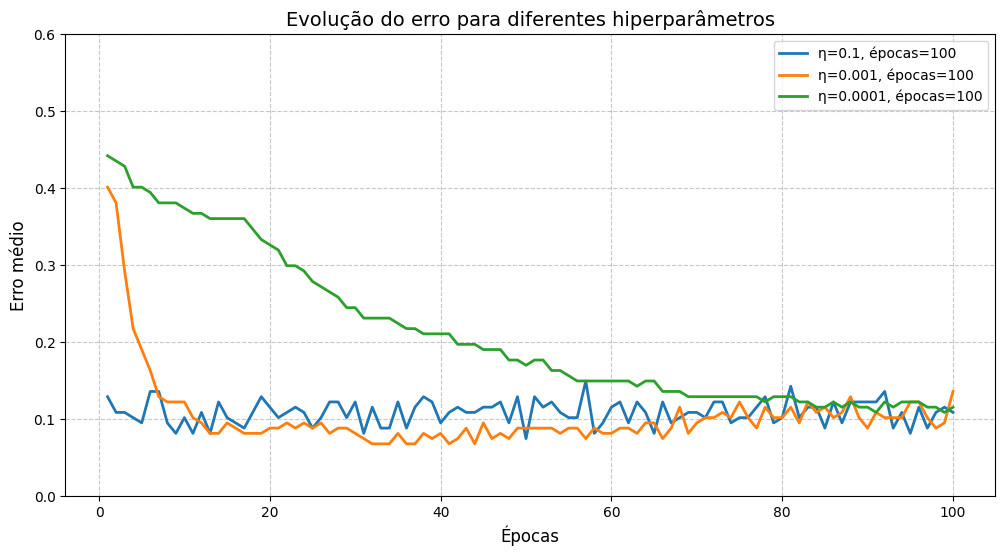

In [515]:
epocas_range = np.arange(1, 101)
erro_medio = {                                                      # erro medio para cada valor de época e eta
    "η=0.1, épocas=100": resultado_treino_1["evolucao do erro"],
    "η=0.001, épocas=100": resultado_treino_2["evolucao do erro"],
    "η=0.0001, épocas=100": resultado_treino_3["evolucao do erro"],
}

plt.figure(figsize=(12, 6))

for chave, valor in erro_medio.items():
    plt.plot(epocas_range[:len(valor)], valor, label=chave, linewidth=2)

plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Erro médio', fontsize=12)
plt.title('Evolução do erro para diferentes hiperparâmetros', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 0.6)
plt.show()

#### Taxa de erro de treinamento ao longo de 200 épocas para diferentes valores de $\eta$

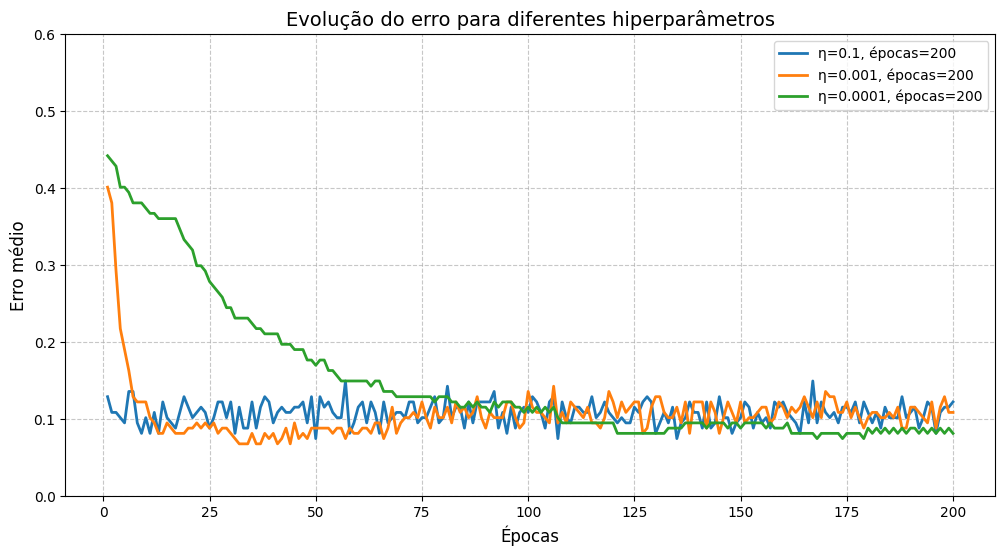

In [516]:
epocas_range = np.arange(1, 201)
erro_medio = {                                                      # erro medio para cada valor de época e eta
    "η=0.1, épocas=200": resultado_treino_4["evolucao do erro"],
    "η=0.001, épocas=200": resultado_treino_5["evolucao do erro"],
    "η=0.0001, épocas=200": resultado_treino_6["evolucao do erro"],
}

plt.figure(figsize=(12, 6))

for chave, valor in erro_medio.items():
    plt.plot(epocas_range[:len(valor)], valor, label=chave, linewidth=2)

plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Erro médio', fontsize=12)
plt.title('Evolução do erro para diferentes hiperparâmetros', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 0.6)
plt.show()

#### Acurácia do teste do Perceptron para diferentes valores de $\eta$ (treino com 100 épocas)

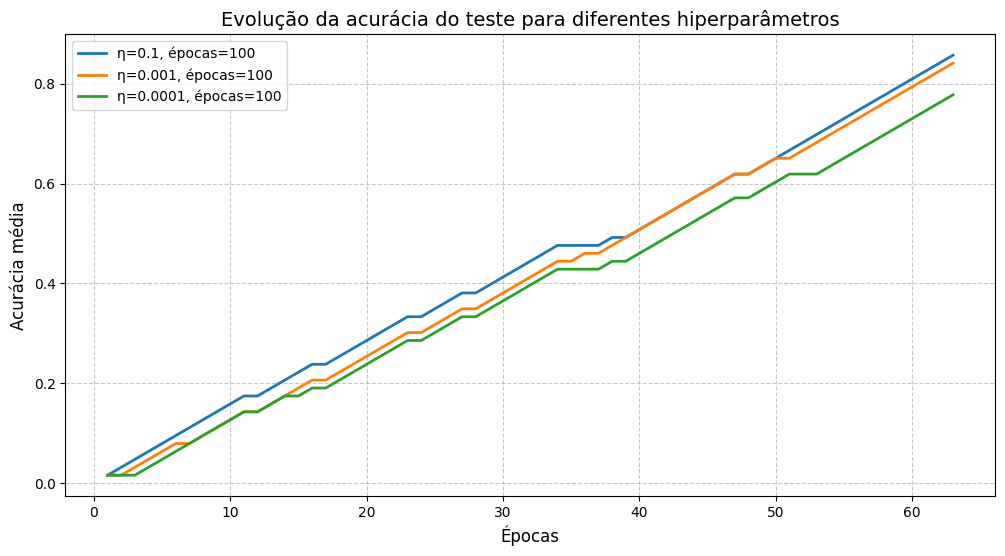

In [538]:
epocas_range = np.arange(1, X_test.shape[0] + 1)
acuracia_media = {                                                      # acuracia média para cada valor de eta
    "η=0.1, épocas=100": resultado_teste_1["evolucao acuracia"],
    "η=0.001, épocas=100": resultado_teste_2["evolucao acuracia"],
    "η=0.0001, épocas=100": resultado_teste_3["evolucao acuracia"],
}

plt.figure(figsize=(12, 6))

for chave, valor in acuracia_media.items():
    plt.plot(epocas_range[:len(valor)], valor, label=chave, linewidth=2)

plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Acurácia média', fontsize=12)
plt.title('Evolução da acurácia do teste para diferentes hiperparâmetros', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### Acurácia do teste do Perceptron para diferentes valores de $\eta$ (treino com 200 épocas)

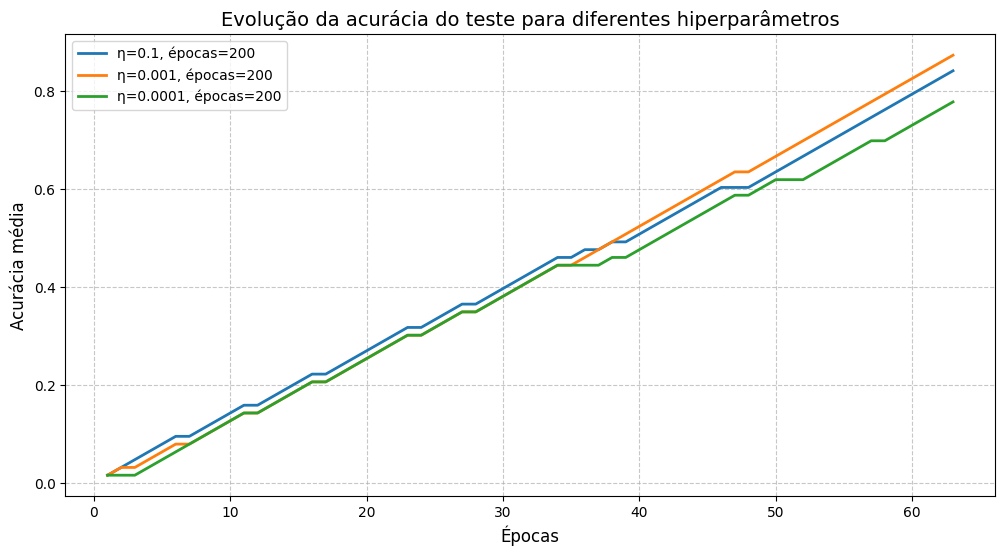

In [537]:
epocas_range = np.arange(1, X_test.shape[0] + 1)
acuracia_media = {                                                      # acuracia média para cada valor de eta
    "η=0.1, épocas=200": resultado_teste_4["evolucao acuracia"],
    "η=0.001, épocas=200": resultado_teste_5["evolucao acuracia"],
    "η=0.0001, épocas=200": resultado_teste_6["evolucao acuracia"],
}

plt.figure(figsize=(12, 6))

for chave, valor in acuracia_media.items():
    plt.plot(epocas_range[:len(valor)], valor, label=chave, linewidth=2)

plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Acurácia média', fontsize=12)
plt.title('Evolução da acurácia do teste para diferentes hiperparâmetros', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### Resultados observados

- A divisão do dataset se deu por 147 amostras de treino (70%) e 63 amostras de teste (30%);
- A pesar da divisão ser boa, o conjunto de amostras é relativamente pequeno para se treinar uma rede;
- Os treinos com 100 épocas apresentaram um teste com desvio padrão da acurácia muito alto (~0.2) em relação ao desvio padrão da acurácia no treinamento (~0.05). Isso sugere que a rede pode ser sensível a variações nas amostras de teste;
- A rede treinada com 100 épocas, teve o melhor resultado com uma taxa de aprendizado $\eta = 0.1$, tendo alcançado 85.71% de acurácia no teste;
- A rede treinada com 200 épocas, teve o melhor resultado com uma taxa de aprendizado $\eta = 0.001$, tendo alcançado 87.30% de acurácia no teste;
- Para uma taxa de aprendizado de $\eta = 0.0001$ e 100 épocas, o erro demora a diminuir, mas não varia tanto. Ou seja, os resultados podem ser melhores mas seria necessário mais épocas (aumentando o custo computacional)
- Podemos observar isso ao ver o resultado do erro médio no treinamento com 200 épocas. Com uma taxa de aprendizado de $\eta = 0.0001$, a rede apresentou menos de 10% de taxa de erro sem muitas variações;
- Não podemos dizer uma melhor configuração de hiperparâmetro, no momento, apenas olhando para a acurácia;

### Referências

- Slides apresentados pelo docente durante as aulas;
- https://urialmog.medium.com/the-perceptron-61052ed85105;
- https://pyimagesearch.com/2021/05/06/implementing-the-perceptron-neural-network-with-python/;
- https://www.w3schools.com/python/matplotlib_plotting.asp;
- https://www.w3schools.com/python/python_ml_scatterplot.asp;
- https://www.w3schools.com/python/python_dictionaries.asp;
- https://pt.stackoverflow.com/questions/423668/qual-%C3%A9-a-diferen%C3%A7a-entre-utilizar-e-no-python;
- https://www.w3schools.com/python/python_lists_change.asp;
- https://stackoverflow.com/questions/40172073/check-one-arrays-elements-contains-in-another-array/40172317;
- https://www.w3schools.com/python/ref_list_append.asp;
- https://stackoverflow.com/questions/16476924/how-can-i-iterate-over-rows-in-a-pandas-dataframe;
- https://www.geeksforgeeks.org/python-generate-random-numbers-within-a-given-range-and-store-in-a-list/;
- https://stackoverflow.com/questions/52991675/how-to-specify-a-random-seed-while-using-pythons-numpy-random-choice;
- https://thomascountz.com/2018/04/13/calculate-decision-boundary-of-perceptron#:~:text=A%20perceptron%20is%20more%20specifically,that%20line%20a%20decision%20boundary;
- https://stats.stackexchange.com/questions/71335/decision-boundary-plot-for-a-perceptron;
- https://www.geeksforgeeks.org/python-statistics-stdev/;
- https://pythonacademy.com.br/blog/f-strings-no-python;
- https://www.geeksforgeeks.org/how-to-get-first-n-items-from-a-list-in-python/;